In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import vartools as vt

## get_data

In [2]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


## var_stocks

In [3]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)
n_stocks =[2193, 1211, 3221, 761, 1231]
conf = 95
long = True

var_df = vt.var_stocks(data, n_stocks, conf, long, stocks)
var_df

[*********************100%***********************]  5 of 5 completed


,Métrica,Porcentaje,cash
0,VaR,0.0289,"33,039.6968"
1,cVaR,0.0464,"53,056.0623"


## var_forex

In [4]:
currencies = ['CHFMXN=X', 'MXN=X']
start_date = "2020-01-01"
end_date = "2024-12-02"
type = 'Close'

data = vt.get_data(currencies, start_date, end_date, type)
positions = [7100000, 5300000] # How much you have in each currency. Must match the order in currencies.
conf = 99 # Nivel de confianza
long = True

var_forex_df = vt.var_forex(data, positions, conf, long, currencies)
var_forex_df

[*********************100%***********************]  2 of 2 completed


,Métrica,Porcentual,Cash
0,VaR,0.0185,"5,041,647.6883"
1,cVaR,0.0238,"6,478,978.9919"


## rebalance_stocks

In [5]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

rt = data.pct_change().dropna()
stock_value = n_stocks * data.iloc[-1]
portfolio_value = stock_value.sum()
w_original = stock_value / portfolio_value
w_opt = [0.33, 0.15, 0.06, 0.46, 0.00]

rebalance_df = vt.rebalance_stocks(w_original, w_opt, data, stocks, portfolio_value)
rebalance_df

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,TSLA,AMD,LMT,JPM
Peso Original,0.2462,0.1304,0.1824,0.3048,0.1362
Peso Óptimo,0.3300,0.1500,0.0600,0.4600,0.0000
Acciones (C/V),746.0000,181.0000,"-2,162.0000",387.0000,"-1,231.0000"


## var_weights

In [6]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

weights = [0.2457, 0.1301, 0.1820, 0.3064, 0.1358]
conf = 95
var_pct = vt.var_weights(data, weights, conf)
var_pct

[*********************100%***********************]  5 of 5 completed


0.028849472926012688

## cvar_weights

In [7]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"
type = 'Close' # 'Close', select the type of price you want to download

data = vt.get_data(stocks, start_date, end_date, type)

weights = [0.2457, 0.1301, 0.1820, 0.3064, 0.1358]
conf = 95
cvar_pct = vt.cvar_weights(data, weights, conf)
cvar_pct

[*********************100%***********************]  5 of 5 completed


0.04634396369272134

## opt_sharpe

In [8]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'
type='Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
rf = 0.04413

opt_sharpe_weights = vt.opt_sharpe(returns, rf)
opt_sharpe_weights

[*********************100%***********************]  8 of 8 completed


array([4.21950879e-01, 1.57706277e-01, 0.00000000e+00, 4.00729095e-17,
       1.41441732e-01, 0.00000000e+00, 2.78901112e-01, 9.26813221e-18])

## min_variance

In [9]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'
type='Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()

min_var_weights = vt.min_variance(returns)
min_var_weights

[*********************100%***********************]  8 of 8 completed


array([2.83347707e-01, 0.00000000e+00, 1.94422452e-02, 2.56840111e-01,
       8.16280367e-02, 2.59838938e-01, 9.89029626e-02, 6.03087458e-18])

## mcc_portfolio

In [10]:
# bonds, commodities, equities and real estate
stocks = ['VBTLX', 'GSG', 'VTI', 'VNQ']
start_date = '2019-01-01'
end_date = '2024-01-01'
type = 'Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
alpha = 0.05

mcc_weights = vt.mcc_portfolio(returns, alpha)
mcc_weights

[*********************100%***********************]  4 of 4 completed


array([0.66012859, 0.12093397, 0.11712357, 0.10181387])

## cvar_contributions

In [11]:
# bonds, commodities, equities and real estate
stocks = ['VBTLX', 'GSG', 'VTI', 'VNQ']
start_date = '2019-01-01'
end_date = '2024-01-01'
type = 'Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
alpha = 0.05

mcc_weights = vt.mcc_portfolio(returns, alpha)

cvar_contributions = vt.cvar_contributions(mcc_weights, returns, alpha)
cvar_contributions

[*********************100%***********************]  4 of 4 completed


[0.0029482998394997407,
 0.0029641146206416313,
 0.0027409516153988674,
 0.0029627856803795946]

## min_cvar

In [12]:
# bonds, commodities, equities and real estate
stocks = ['VBTLX', 'GSG', 'VTI', 'VNQ']
start_date = '2019-01-01'
end_date = '2024-01-01'
type = 'Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
alpha = 0.05

min_cvar = vt.min_cvar(returns, alpha)
min_cvar

[*********************100%***********************]  4 of 4 completed


array([0.95628908, 0.03740053, 0.00631039, 0.        ])

## plot_weights

[*********************100%***********************]  8 of 8 completed


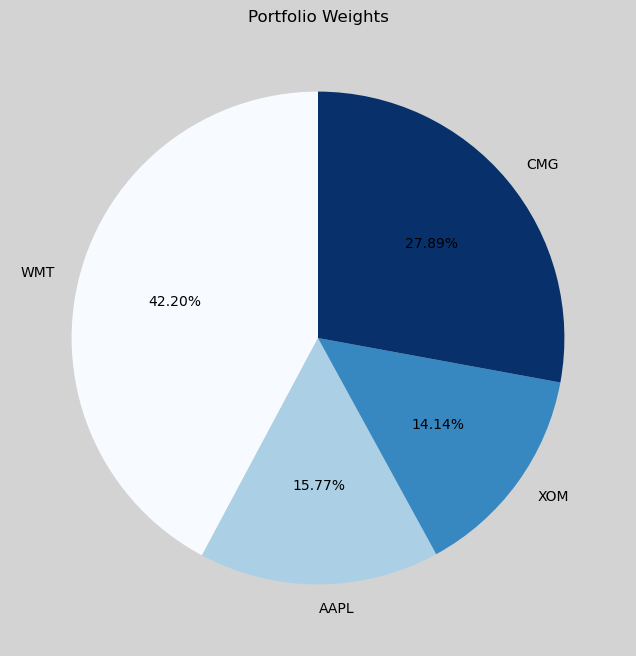

In [13]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'
type='Close'

data = vt.get_data(stocks, start_date, end_date, type)
returns = data.pct_change().dropna()
rf = 0.04413

opt_sharpe = vt.opt_sharpe(returns, rf)

vt.plot_weights(stocks, opt_sharpe)

## call_delta and put_delta

In [14]:
S_call = 20.3
K_call = 20.43
r_call = 0.0425
sigma_call = 0.102
T_call = 1/12

S_put = 20.3
K_put = 20.2
r_put = 0.0425
sigma_put = 0.156
T_put = 1/12

delta_call = vt.BlackScholes().call_delta(S_call, K_call, r_call, sigma_call, T_call)
delta_put = vt.BlackScholes().put_delta(S_put, K_put, r_put, sigma_put, T_put)

delta_call, delta_put

(0.46740603432697553, 0.4165136615097752)

In [15]:
# Write in order S, K, r, sigma, T

call = [20.3, 20.43, 0.0425, 0.102, 1/12]
put = [20.3, 20.2, 0.0425, 0.156, 1/12]

delta_call = vt.BlackScholes().call_delta(*call)
delta_put = vt.BlackScholes().put_delta(*put)

delta_call, delta_put

(0.46740603432697553, 0.4165136615097752)

## delta_hedge

In [16]:
# Write in order S, K, r, sigma, T, N (money invested in each option)

info_call = [[20.3, 20.43, 0.0425, 0.102, 1/12, 23],
            [20.3, 20.52, 0.0425, 0.111, 1/12, 25],
            [20.3, 20.43, 0.0421, 0.297, 6/12, 17],
            [20.3, 20.52, 0.0421, 0.289, 6/12, 32]]

info_put = [[20.3, 20.2, 0.0425, 0.156, 1/12, 12],
            [20.3, 20, 0.0425, 0.153, 1/12, 16],
            [20.3, 20.2, 0.0421, 0.348, 6/12, 11],
            [20.3, 20, 0.0421, 0.378, 6/12, 17]]

# If N is in millions of dollar, then
hedge = vt.BlackScholes().delta_hedge(info_call, info_put)
print(f'Buy {hedge} millions of dollars of the underlying asset')

Buy 27.301081694288555 millions of dollars of the underlying asset
